In [9]:
import pandas as pd
import torch
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('./rs/results.csv')
data.sample(5)

,Unnamed: 0,arch,activation,attack,iterations,eps 2,eps 4,eps 6,eps 8,eps 10,SROCC
3,3,VGG-16-DBCNN,relu,PGD,5,0.317589,0.332000,0.331830,0.325624,0.319478,0.913048
0,0,VGG-16-DBCNN+cayley,relu,PGD,1,0.136114,0.152935,0.149586,0.139354,0.126001,0.912809
11,11,VGG-16-DBCNN+cayley2,relu,PGD,8,0.415458,0.448984,0.442682,0.426572,0.406971,0.912853
4,4,VGG-16-DBCNN,relu,PGD,8,0.365790,0.372459,0.358516,0.344501,0.329775,0.913048
10,10,VGG-16-DBCNN+cayley2,relu,PGD,5,0.340911,0.396213,0.406756,0.397342,0.384841,0.912853


In [3]:
data['arch'] = data['arch'].apply(lambda s: s.replace('-DBCNN', ''))
data

,Unnamed: 0,arch,activation,attack,iterations,eps 2,eps 4,eps 6,eps 8,eps 10,SROCC
0,0,VGG-16+cayley,relu,PGD,1,0.136114,0.152935,0.149586,0.139354,0.126001,0.912809
1,1,VGG-16,relu,PGD,1,0.174570,0.179289,0.168443,0.152551,0.134528,0.913048
2,2,VGG-16,relu,PGD,3,0.282984,0.296788,0.297177,0.293316,0.291289,0.913048
3,3,VGG-16,relu,PGD,5,0.317589,0.332000,0.331830,0.325624,0.319478,0.913048
4,4,VGG-16,relu,PGD,8,0.365790,0.372459,0.358516,0.344501,0.329775,0.913048
5,5,VGG-16+cayley,relu,PGD,3,0.296090,0.353416,0.372731,0.378914,0.379215,0.912809
6,6,VGG-16+cayley,relu,PGD,5,0.393955,0.451650,0.461730,0.452026,0.438439,0.912809
7,7,VGG-16+cayley,relu,PGD,8,0.473130,0.506386,0.500687,0.484760,0.465668,0.912809
8,8,VGG-16+cayley2,relu,PGD,1,0.108776,0.122817,0.121462,0.114769,0.106156,0.912853
9,9,VGG-16+cayley2,relu,PGD,3,0.249524,0.302656,0.322697,0.330498,0.332317,0.912853


In [12]:
baseline = [("VGG-16", "relu")]

group_cayley = [
    ("VGG-16+cayley", "relu"), 
    ("VGG-16+cayley2", "relu"),
    ("VGG-16+cayley3", "relu"),
]

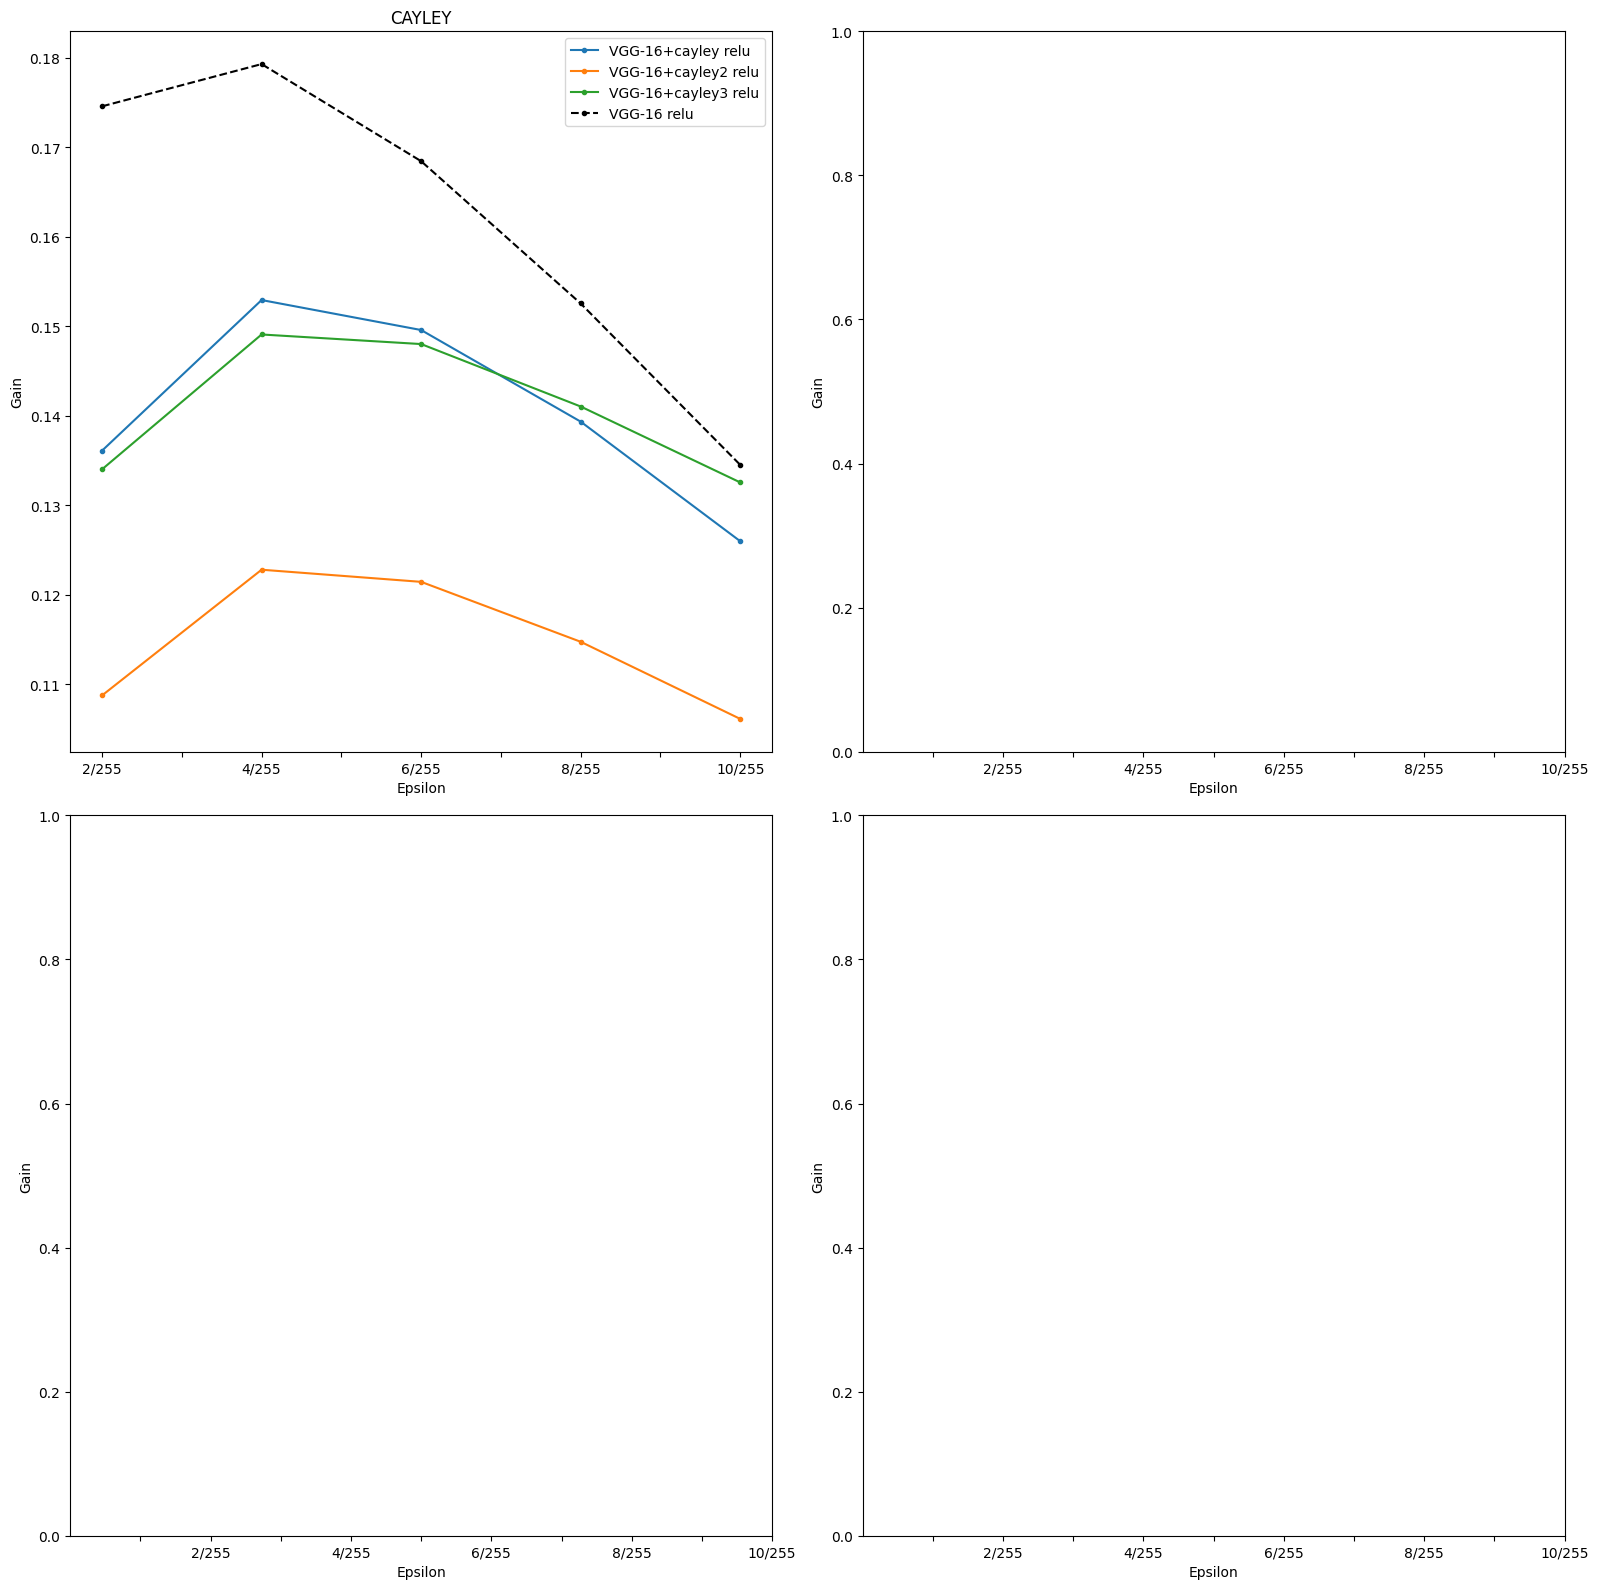

In [8]:
groups = [group_cayley]
epsilons = [2, 4, 6, 8, 10]
eps_labels = ['','2/255','','4/255','','6/255','','8/255','','10/255']
iters = 1.0

fig, axs = plt.subplots(2, 2, figsize=(16,16), subplot_kw={"xticks": list(range(1,11)),"xticklabels": eps_labels, "xlabel": "Epsilon", "ylabel": "Gain"})

axs[0,0].set_title("CAYLEY")
fig.tight_layout()
axs = axs.flatten()

for i in range(len(groups)):
    axis = axs[i]
    grp = groups[i]
    for arch, activ in grp:
        y_axis = data[(data["arch"]==arch)&(data["iterations"]==iters)&(data["activation"]==activ)].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[-1]}"].values.tolist()[0]
        if ((arch, activ) != baseline[0]):
            axis.plot(epsilons, y_axis, marker=".",label=f"{arch} {activ}")
    y_axis = data[(data["arch"]==baseline[0][0])&(data["iterations"]==iters)&(data["activation"]==baseline[0][1])].loc[:,f"eps {epsilons[0]}": f"eps {epsilons[-1]}"].values.tolist()[0]
    axis.plot(epsilons, y_axis,'k--', marker=".",label=f"{baseline[0][0]} {baseline[0][1]}")
    axis.legend(loc="upper right")

plt.show()

In [17]:
x = [2, 4, 6, 8, 10]
grp = set(group_cayley+baseline)
iters = [1, 3, 5, 8]

df_pgd = pd.DataFrame(columns=['architecture', 'activation', 'SROCC','result_iter=1','result_iter=3','result_iter=5', 'result_iter=8'])

for arch, activ in grp:
    y_axises = []
    for it in iters:
        y_axis = data[(data["arch"]==arch)&(data["iterations"]==it)&(data["activation"]==activ)]\
            .loc[:,f"eps {epsilons[0]}": f"eps {epsilons[-1]}"].values.tolist()[0]
        y_axises.append(y_axis)
    srocc = data[(data["arch"]==arch)&(data["iterations"]==iters[0])&(data["activation"]==activ)].loc[:,"SROCC"].values.tolist()[0]
    df_pgd.loc[len(df_pgd)] = {
                                'architecture': arch, 
                                'activation': activ,
                                'SROCC': float(srocc),
                                'result_iter=1': (np.trapezoid(y_axises[0], x)),
                                'result_iter=3': (np.trapezoid(y_axises[1], x)),
                                'result_iter=5': (np.trapezoid(y_axises[2], x)),
                                'result_iter=8': (np.trapezoid(y_axises[3], x))
                                }

baseline_res_iter1 = df_pgd[(df_pgd['architecture']==baseline[0][0])&(df_pgd['activation']==baseline[0][1])]['result_iter=1'].values[0]
baseline_res_iter3 = df_pgd[(df_pgd['architecture']==baseline[0][0])&(df_pgd['activation']==baseline[0][1])]['result_iter=3'].values[0]
baseline_res_iter5 = df_pgd[(df_pgd['architecture']==baseline[0][0])&(df_pgd['activation']==baseline[0][1])]['result_iter=5'].values[0]
baseline_res_iter8 = df_pgd[(df_pgd['architecture']==baseline[0][0])&(df_pgd['activation']==baseline[0][1])]['result_iter=8'].values[0]
# print(baseline_res_iter1)
# print( (baseline_res_iter1-df_pgd['result_iter=1'])/baseline_res_iter1)

df_pgd['gain_iter=1'] = (baseline_res_iter1 - df_pgd['result_iter=1'])/baseline_res_iter1 *100
df_pgd['gain_iter=3'] = (baseline_res_iter3 - df_pgd['result_iter=3'])/baseline_res_iter3 *100
df_pgd['gain_iter=5'] = (baseline_res_iter5 - df_pgd['result_iter=5'])/baseline_res_iter5 *100
df_pgd['gain_iter=8'] = (baseline_res_iter8 - df_pgd['result_iter=8'])/baseline_res_iter8 *100

In [18]:
df_pgd.sort_values('result_iter=8').style.hide()

architecture,activation,SROCC,result_iter=1,result_iter=3,result_iter=5,result_iter=8,gain_iter=1,gain_iter=3,gain_iter=5,gain_iter=8
VGG-16,relu,0.913048,1.309663,2.348835,2.615976,2.846517,0.000000,0.000000,0.000000,0.000000
VGG-16+cayley2,relu,0.912853,0.933028,2.493545,3.126376,3.458906,28.758172,-6.160913,-19.510874,-21.513635
VGG-16+cayley3,relu,0.911648,1.142903,2.470889,3.097496,3.523415,12.733018,-5.196367,-18.406870,-23.779880
VGG-16+cayley,relu,0.912809,1.145866,2.885427,3.563207,3.922463,12.506800,-22.845043,-36.209465,-37.798672
